# Portafolios de Inversión
## Rebalanceos - Python
José Armando Melchor Soto

---





### Ejercicio 1

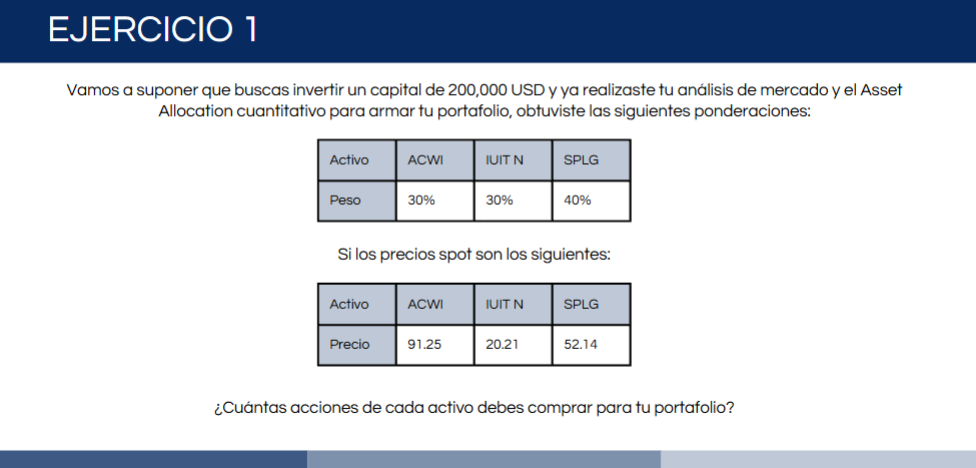

---

#### Librerías 

In [43]:
import pandas as pd 
import numpy as np

---

#### DataFrame

In [44]:
df = pd.DataFrame(columns = ['ACWI', 'IUIT', 'SPLG'])
df.loc['Peso'] = [.3,.3,.4]
df.loc['Precio']= [91.25,20.21,52.14]
df

,ACWI,IUIT,SPLG
Peso,0.30,0.30,0.40
Precio,91.25,20.21,52.14


#### Capital

In [45]:
capital = 200000

#### No. Acciones

In [46]:
df.loc['N. Acciones']= np.floor((df.loc['Peso'] * capital)/df.loc['Precio'])
df

,ACWI,IUIT,SPLG
Peso,0.30,0.30,0.40
Precio,91.25,20.21,52.14
N. Acciones,657.00,2968.00,1534.00


#### Nuevo DataFrame en Tiempo t

In [48]:
df_T = pd.DataFrame(columns = ['ACWI', 'IUIT', 'SPLG'])
df_T.loc['Acciones Inicial'] = df.loc['N. Acciones']
df_T.loc['Precio Actual'] = [87.45,20.17,77.15]
df_T.loc['Valor Posicion'] = df_T.loc['Acciones Inicial']* df_T.loc['Precio Actual']
df_T.loc['Peso Real'] = df_T.loc['Valor Posicion'] / df_T.loc['Valor Posicion'].sum()*100

df_T

,ACWI,IUIT,SPLG
Acciones Inicial,657.000000,2968.000000,1534.000000
Precio Actual,87.450000,20.170000,77.150000
Valor Posicion,57454.650000,59864.560000,118348.100000
Peso Real,24.379559,25.402148,50.218293


#### DataFrame Rebalanceo 

In [54]:
valor_portafolio = df_T.loc['Valor Posicion'].sum()
rebalanceo = pd.DataFrame(columns = ['ACWI', 'IUIT', 'SPLG'])


rebalanceo.loc['N Acciones Inicial'] = df_T.loc['Acciones Inicial']
# (Objetivo - Real) * V_p
rebalanceo.loc['C/V']=np.floor((df.loc['Peso'] - df_T.loc['Peso Real'])*valor_portafolio)/ df_T.loc['Precio Actual']
rebalanceo.loc['N Acciones Final'] = rebalanceo.loc['N Acciones Inicial'] + rebalanceo.loc['C/V']
rebalanceo.loc['Valor Posicion'] = rebalanceo.loc['N Acciones Inicial']* df_T.loc['Precio Actual']
rebalanceo.loc['Peso Real'] = rebalanceo.loc['Valor Posicion'] / rebalanceo.loc['Valor Posicion'].sum()*100


rebalanceo

,ACWI,IUIT,SPLG
N Acciones Inicial,657.000000,2968.000000,1534.000000
C/V,-64891.538022,-293294.794249,-152178.146468
N Acciones Final,-64234.538022,-290326.794249,-150644.146468
Valor Posicion,57454.650000,59864.560000,118348.100000
Peso Real,24.379559,25.402148,50.218293


#### Fórmula

$$Rebalance = \frac{(w_{obj} - w_{real})*V_{port}}{P_t}  $$